In [ ]:
pip install facenet_pytorch

(-0.5, 136.5, 159.5, -0.5)

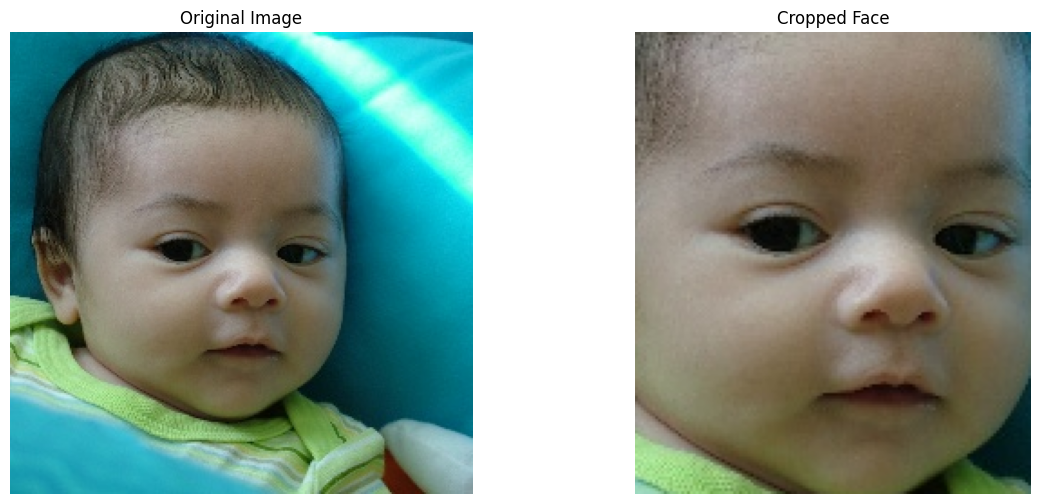

In [56]:
from facenet_pytorch import MTCNN
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to get the face bounding box using MTCNN
def get_face_box(image_path, mtcnn):
    image = Image.open(image_path).convert('RGB')
    boxes, _ = mtcnn.detect(image)
    return boxes[0] if boxes is not None else None

# Initialize MTCNN
mtcnn = MTCNN(keep_all=True)

# Load the first deepfake image
first_deepfake_image_path = "00000.jpg"

if first_deepfake_image_path is not None:
    # Load and display the original image
    original_image = Image.open(first_deepfake_image_path).convert("RGB")
    #plt.title("Original Image")
    #plt.imshow(original_image)
    #plt.show()


    # Get the bounding box of the face
    face_box = get_face_box(first_deepfake_image_path, mtcnn)

    # Display the cropped face region
    if face_box is not None:
        cropped_face = original_image.crop(face_box)
        #plt.title("Cropped Face")
        #v= np.array(cropped_face)
        #print(v.shape)
        #plt.imshow(cropped_face)
        #plt.show()
    else:
        print("No face detected in the image.")
else:
    print("No image found in the specified directory.")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(cropped_face)
axes[1].set_title("Cropped Face")
axes[1].axis('off')